## Classification (PA3.5c)

In [1]:
## Data generation

In [2]:
from basic_fcn import *
from unet_fcn import *
from utils import *
import torch.optim as optim
import time
from torch.utils.data import DataLoader
import torch
import gc
import copy
from dataloader_4 import *
from starter_5 import *


#hyper param
epochs = 30   
lr = 0.0004
criterion = nn.CrossEntropyLoss()# Choose an appropriate loss function from https://pytorch.org/docs/stable/_modules/torch/nn/modules/loss.html
n_class = 10

print("creating model...")
fcn_model = UNET(n_class=n_class)
fcn_model.apply(init_weights)

# gpu
gpu_status = torch.cuda.is_available()
print("GPU:", gpu_status)

if gpu_status : 
    device = torch.device('cuda') # determine which device to use (gpu or cpu)
else : 
    device = torch.device('cpu')

fcn_model.to(device)
    
print("Training...")
val(fcn_model, 0)  # show the accuracy before training
model_name="latest_model_5c"
train_loss_record, valid_loss_record = train(fcn_model, epochs,lr, save_fp=model_name) 

status : GPU
creating model...
GPU: True
Training...


/opt/conda/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Loss at epoch: 0 is 3.626545502589299
IoU at epoch: 0 is 0.0002009701184823258
Pixel acc at epoch: 0 is 0.00014690684594580278
epoch0, iter0, loss: 2.5225636959075928
epoch0, iter10, loss: 1.1073306798934937
epoch0, iter20, loss: 1.1973236799240112
epoch0, iter30, loss: 0.9292262196540833
epoch0, iter40, loss: 0.8805152773857117
epoch0, iter50, loss: 1.342674970626831
epoch0, iter60, loss: 0.9013559818267822
epoch0, iter70, loss: 0.9340522289276123
epoch0, iter80, loss: 0.887749433517456
epoch0, iter90, loss: 0.6311239004135132
epoch0, iter100, loss: 0.7216103672981262
Finish epoch 0, time elapsed 146.0034143924713
Loss at epoch: 0 is 0.7093911537757287
IoU at epoch: 0 is 0.2694887302208466
Pixel acc at epoch: 0 is 0.8054538598427405
epoch1, iter0, loss: 0.757113516330719
epoch1, iter10, loss: 1.1313281059265137
epoch1, iter20, loss: 0.7477052211761475
epoch1, iter30, loss: 1.0739331245422363
epoch1, iter40, loss: 0.8036143779754639
epoch1, iter50, loss: 0.988103449344635
epoch1, iter6

epoch13, iter0, loss: 0.4419074058532715
epoch13, iter10, loss: 0.32637226581573486
epoch13, iter20, loss: 0.40102434158325195
epoch13, iter30, loss: 0.581451416015625
epoch13, iter40, loss: 0.5139943361282349
epoch13, iter50, loss: 0.2763831317424774
epoch13, iter60, loss: 0.5816961526870728
epoch13, iter70, loss: 0.5275499820709229
epoch13, iter80, loss: 0.23399151861667633
epoch13, iter90, loss: 0.32522574067115784
epoch13, iter100, loss: 0.31038010120391846
Finish epoch 13, time elapsed 148.84744596481323
Loss at epoch: 13 is 0.366921250636761
IoU at epoch: 13 is 0.45911535450575014
Pixel acc at epoch: 13 is 0.8636448887678293
epoch14, iter0, loss: 0.27714863419532776
epoch14, iter10, loss: 0.39749106764793396
epoch14, iter20, loss: 0.3154263496398926
epoch14, iter30, loss: 0.28013214468955994
epoch14, iter40, loss: 0.23192733526229858
epoch14, iter50, loss: 0.2507709860801697
epoch14, iter60, loss: 0.4109760522842407
epoch14, iter70, loss: 0.44644272327423096
epoch14, iter80, loss

Loss at epoch: 25 is 0.21998986716453844
IoU at epoch: 25 is 0.5061058754424008
Pixel acc at epoch: 25 is 0.9261982303399307
epoch26, iter0, loss: 0.1582750678062439
epoch26, iter10, loss: 0.29165124893188477
epoch26, iter20, loss: 0.1163259744644165
epoch26, iter30, loss: 0.26115238666534424
epoch26, iter40, loss: 0.11052417010068893
epoch26, iter50, loss: 0.5000563263893127
epoch26, iter60, loss: 0.194306880235672
epoch26, iter70, loss: 0.15865975618362427
epoch26, iter80, loss: 0.23590101301670074
epoch26, iter90, loss: 0.16852380335330963
epoch26, iter100, loss: 0.2095925658941269
Finish epoch 26, time elapsed 150.34152626991272
Loss at epoch: 26 is 0.21424122957082894
IoU at epoch: 26 is 0.5258954681052544
Pixel acc at epoch: 26 is 0.9310291547041672
epoch27, iter0, loss: 0.2605379819869995
epoch27, iter10, loss: 0.5276183485984802
epoch27, iter20, loss: 0.28174248337745667
epoch27, iter30, loss: 0.19174402952194214
epoch27, iter40, loss: 0.08520463109016418
epoch27, iter50, loss:

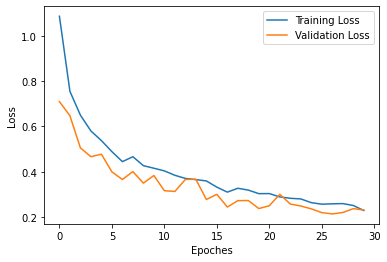

In [3]:
#plot
plt.plot(np.arange(epochs), train_loss_record, label= "Training Loss")
plt.plot(np.arange(epochs), valid_loss_record, label="Validation Loss")
plt.xlabel("Epoches")
plt.ylabel("Loss")
plt.legend()
plt.title("4(b) Weighted loss with data augmentation")
plt.savefig("plots/Q4_b")
plt.show()

in test
Loss :is 0.2778508640252627
IoU is 0.535408734819273
Pixel is 0.9056254808719342


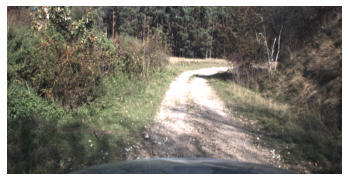

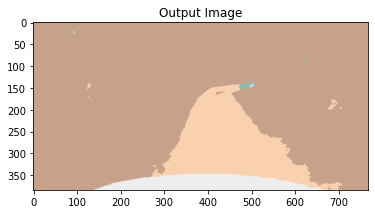

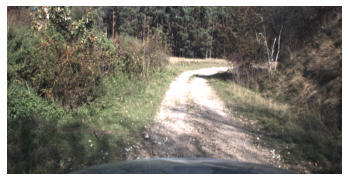

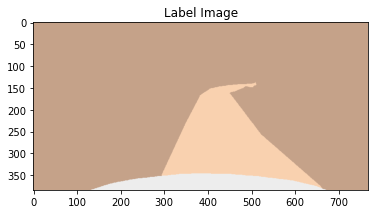

0

In [4]:
def test(model_name):
    print("in test")
    #TODO: load the best model and complete the rest of the function for testing
    fcn_model = torch.load(model_name)

    fcn_model.eval()
    
    losses = []
    mean_iou_scores = []
    accuracy = []

    with torch.no_grad(): # we don't need to calculate the gradient in the validation/testing

        for iter, (inputs, labels, rawimg) in enumerate(test_loader):
    
            # both inputs and labels have to reside in the same device as the model's
            inputs = inputs.to(device) #transfer the input to the same device as the model's
            labels = labels.type(torch.LongTensor).to(device) #transfer the labels to the same device as the model's

            output = fcn_model(inputs)

            loss = criterion(output,labels) #calculate the loss
            losses.append(loss.item()) #call .item() to get the value from a tensor. The tensor can reside in gpu but item() will still work 

            pred = torch.argmax(output, axis = 1) # Make sure to include an argmax to get the prediction from the outputs of your model

            mean_iou_scores.append(np.nanmean(iou_ey(pred, labels, n_class)))  # Complete this function in the util, notice the use of np.nanmean() here
        
            accuracy.append(pixel_acc_ey(pred, labels)) # Complete this function in the util


    print(f"Loss :is {np.mean(losses)}")
    print(f"IoU is {np.mean(mean_iou_scores)}")
    print(f"Pixel is {np.mean(accuracy)}")
    return 0




device = torch.device('cuda') # determine which device to use (gpu or cpu)


def visualize(model_name,test_loader):
    #TODO: load the best model and complete the rest of the function for testing
    fcn_model = torch.load(model_name)
    fcn_model.eval()
    inputimg = []
    pred = []
    with torch.no_grad(): # we don't need to calculate the gradient in the validation/testing
        for iter, (input, label, orgin_img) in enumerate(test_loader):
            inputimg = orgin_img[0]
            input = input.to(device) #transfer the input to the same device as the model's
            label = label.type(torch.LongTensor).to(device) #transfer the labels to the same device as the model's
            output = fcn_model(input)
            pred = torch.argmax(output, axis = 1) # Make sure to include an argmax to get the prediction from the outputs of your model

    class2color = {}
    for k, v in test_dataset.color2class.items():
        class2color[v] = k    

    imgs = []
    for row in pred[0]:
        for col in row:
            imgs.append(class2color[int(col)])
    imgs = np.asarray(imgs).reshape(pred.shape[1], pred.shape[2], 3)
    outputimg = PIL.Image.fromarray(np.array(imgs, dtype=np.uint8))
    plt.axis('off')
    plt.imshow(inputimg)
    plt.show()    
    plt.title('Original Image')

    plt.imshow(outputimg, alpha=0.5)

    plt.title('Output Image')
    plt.show()
    
    imgs = []
    for rows in label[0]:
        for col in rows:
            imgs.append(class2color[int(col)])
    imgs = np.asarray(imgs).reshape(pred.shape[1], pred.shape[2], 3)
    outputimg = PIL.Image.fromarray(np.array(imgs, dtype=np.uint8))
    plt.axis('off')
    plt.imshow(inputimg)
    plt.show()    
    plt.title('Original Image')

    plt.imshow(outputimg, alpha=0.5)

    plt.title('Label Image')
    plt.show()    

    return 0




model_name = 'latest_model_5c'
test(model_name)
visualize(model_name,test_loader)